In [242]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd

In [243]:
ctx = straxbra.XebraContext()

In [244]:
run = '00201'
peaks_data = ctx.get_array(run, 'peaks')

In [245]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
area_per_channel = peaks_data['area_per_channel']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]

In [246]:
def CutCondition(waveform):
    
    
    FirstPeak_area = sum(waveform[:15]) # range in samples (not ns!)
    SecondPeak_area = sum(waveform[15:]) # range in samples (not ns!)

    
    if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
#        print (i , secondS1_area, secondS1_peaktime)
        return(True)
    else:
        return(False)
    

In [247]:
def PrintWaveform(waveform,i):

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(12, 3.5))

    ax1.plot(waveform[i])
    ax2.plot(waveform[i+1])
#     ax1.set_xlim([0, 50])
    plt.show()


In [248]:
def S2_found(integral, width):
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False

In [249]:
def Process(waveform, i):
    CutFlag = CutCondition(waveform[i])
    if CutFlag == True:
        Timestamps_kr_events.append(timestamp[i])
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 65000
        while threshold_timestamp >= counter_timestamp and S2_found(integral = integral[i+j], width = width[i+j]) == False: 
            j += 1
            counter_timestamp = timestamp[i+j]           
        else:
            if S2_found(integral = integral[i+j], width = width[i+j]):
                    #PrintWaveform(waveform[i+j])
                kr_s2_area.append(integral[i+j])
                kr_s2_width.append(width[i+j])
                kr_s2_risetime.append(risetime[i+j])
                kr_s2_drifttime.append(counter_timestamp - timestamp[i])
                    
                return
            else:
                return

In [250]:
num = len(waveform)

kr_s2_area = []
kr_s2_width = []
kr_s2_risetime = []
kr_s2_drifttime = []
Timestamps_kr_events = []
Time_between_S1 = []
print_counter = 0.0
for i in range(0,num):
    
    Process(waveform,i)
    
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
        
print(1.0)

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


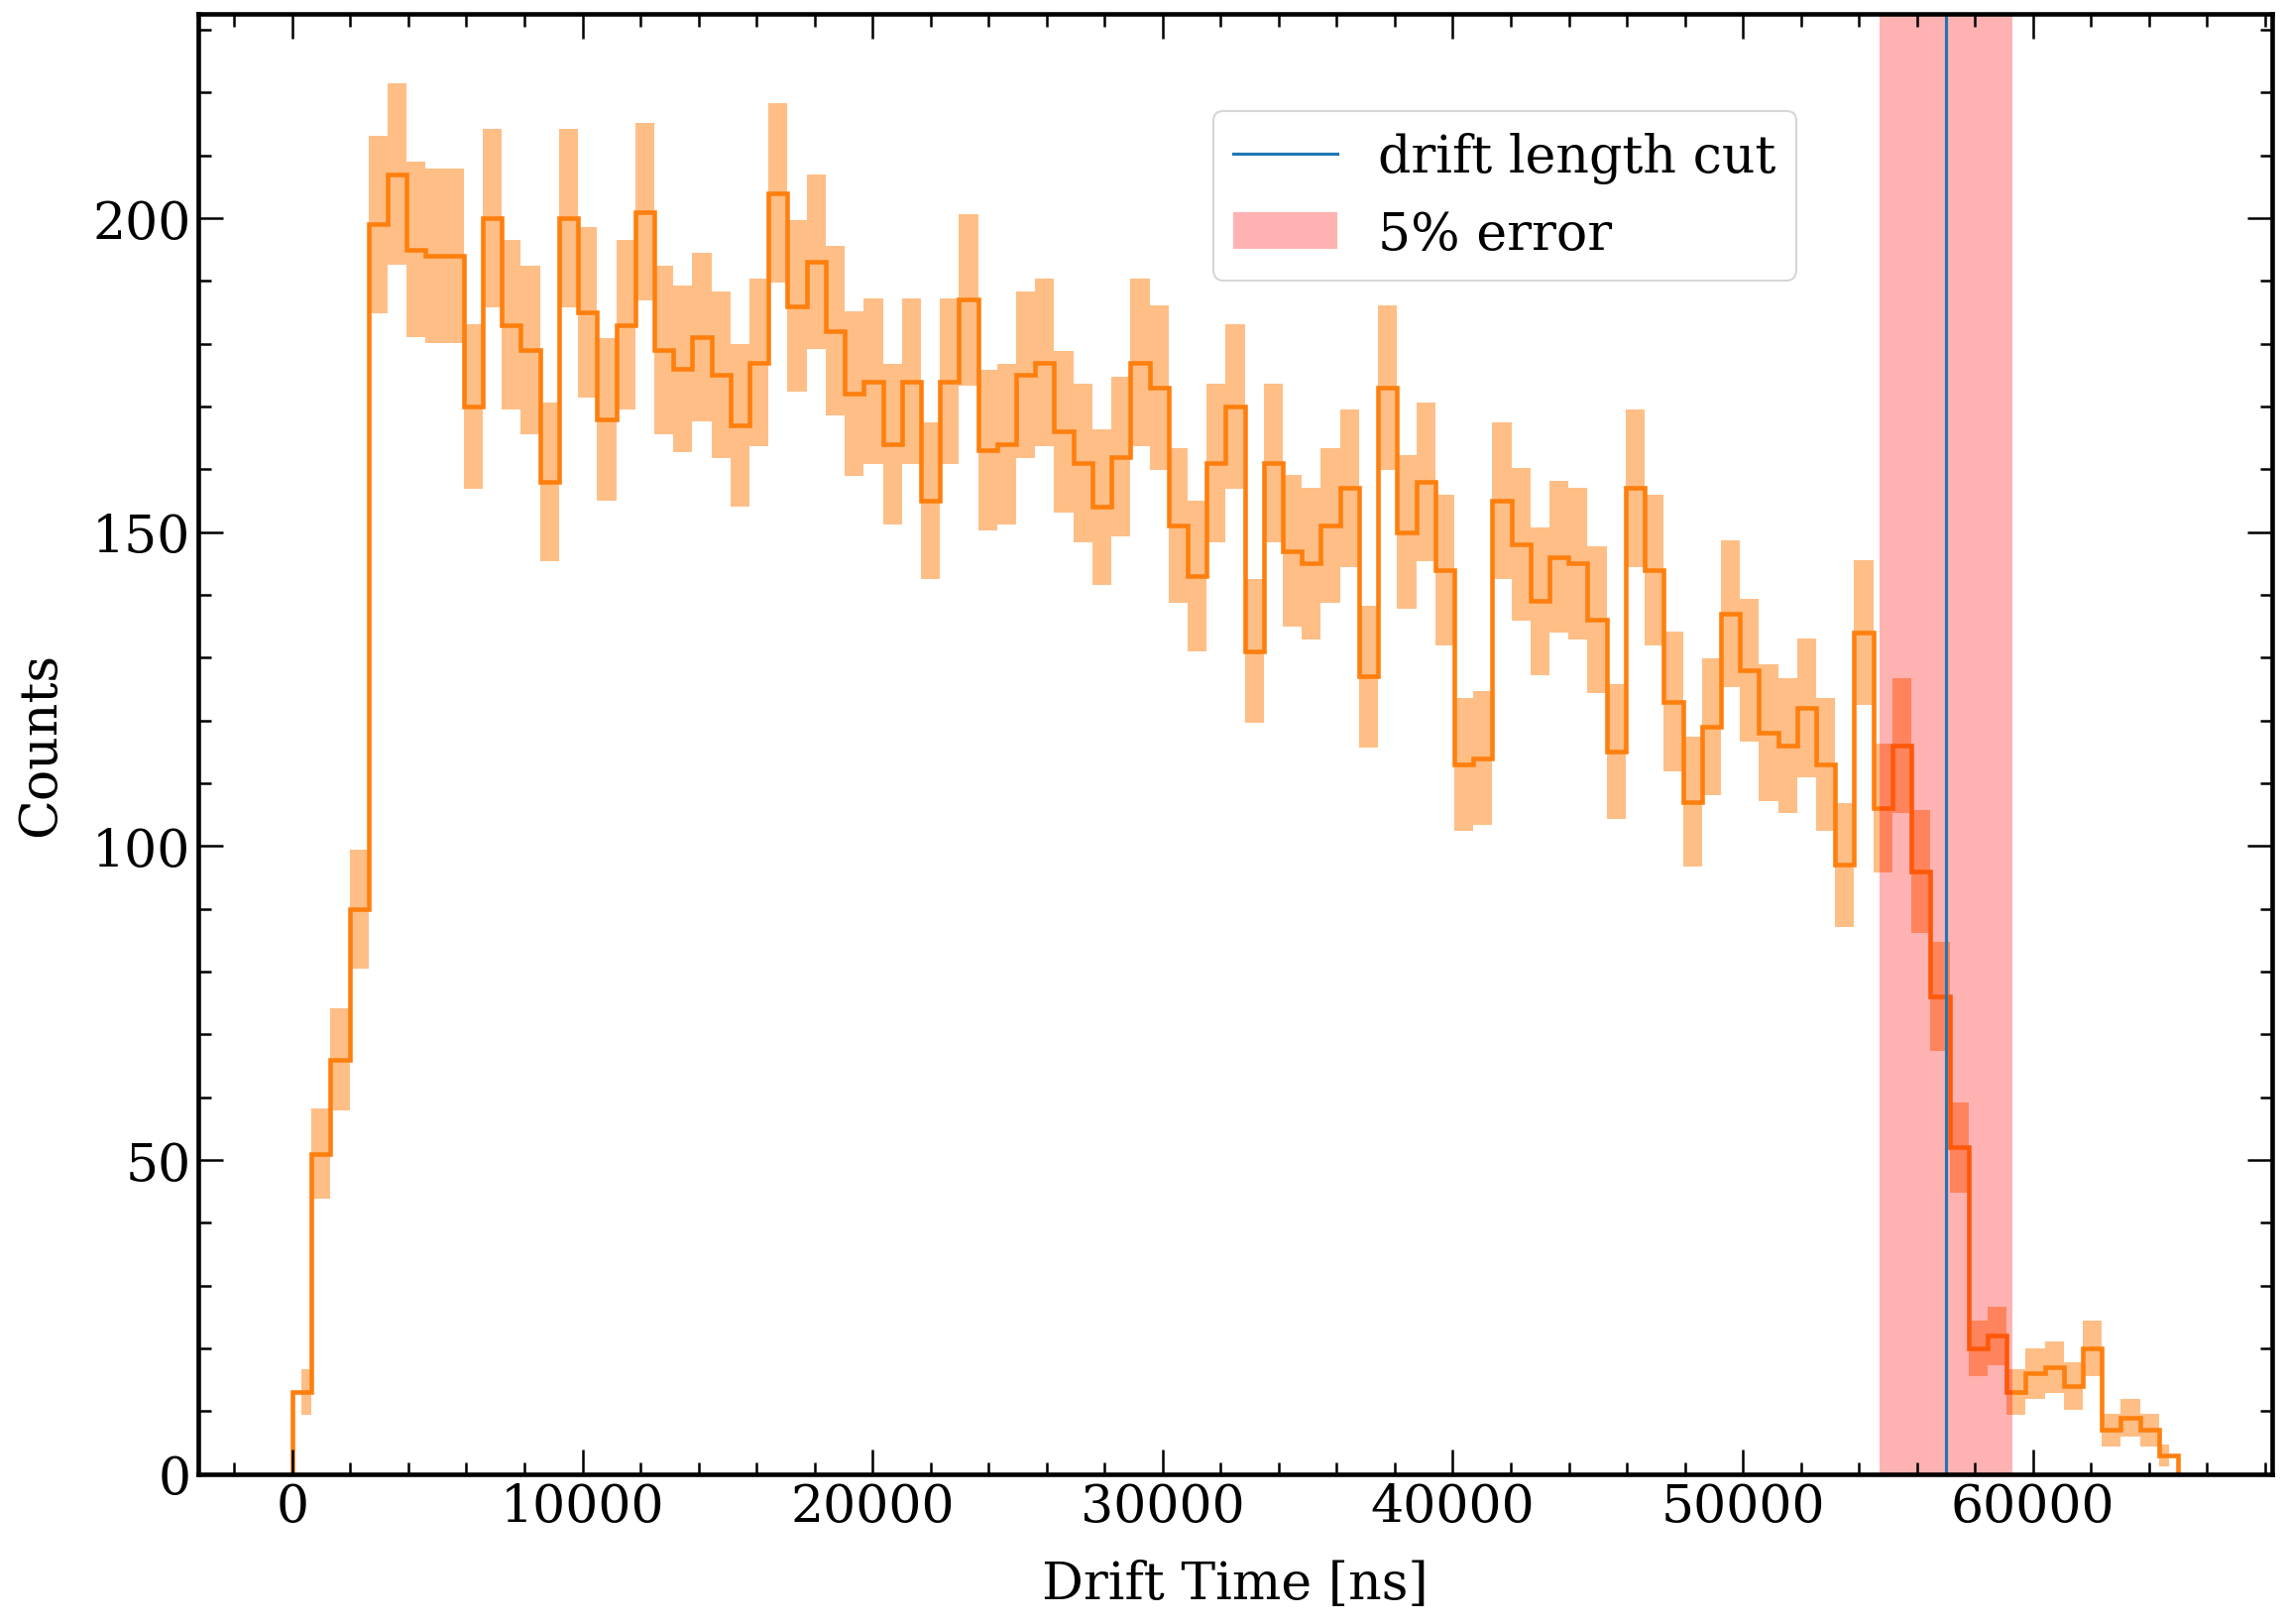

In [251]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(18, 13), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################




# Data plot
time_limit = 65000 # 65000 for E_D = 50 V/cm

bins = 100
#bins_x = np.linspace(45000,50000,bins)
bins_x = np.linspace(0,time_limit,bins)
bins_x_center = (bins_x[1:] + bins_x[:-1])/2
bin_fullwidths = (bins_x[1:] - bins_x[:-1])

counts,_, patches = plt.hist(kr_s2_drifttime, bins=bins_x, density = False, 
                             histtype='step', linewidth = 2.2, color = 'C1')


plt.fill_between(bins_x_center, counts - np.sqrt(counts), counts + np.sqrt(counts), 
                 facecolor='C1', alpha=0.5, step = 'mid')
axes.axvspan(54720,59280,facecolor='r', alpha = 0.3, label = '5% error')
axes.axvline(57000,0, 200, alpha = 1, label = 'drift length cut' )
plt.xlabel('Drift Time [ns]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Counts', fontsize = label_size, labelpad = label_pad)

#plt.xlim(50000, 60000)
plt.ylim(bottom = 0)

'''# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)'''

#fig.savefig(filenameprefix+"_drifttime.png")
plt.legend(loc =8, bbox_to_anchor=(0.63,0.8))
plt.show()

In [252]:
1500/40500

0.037037037037037035

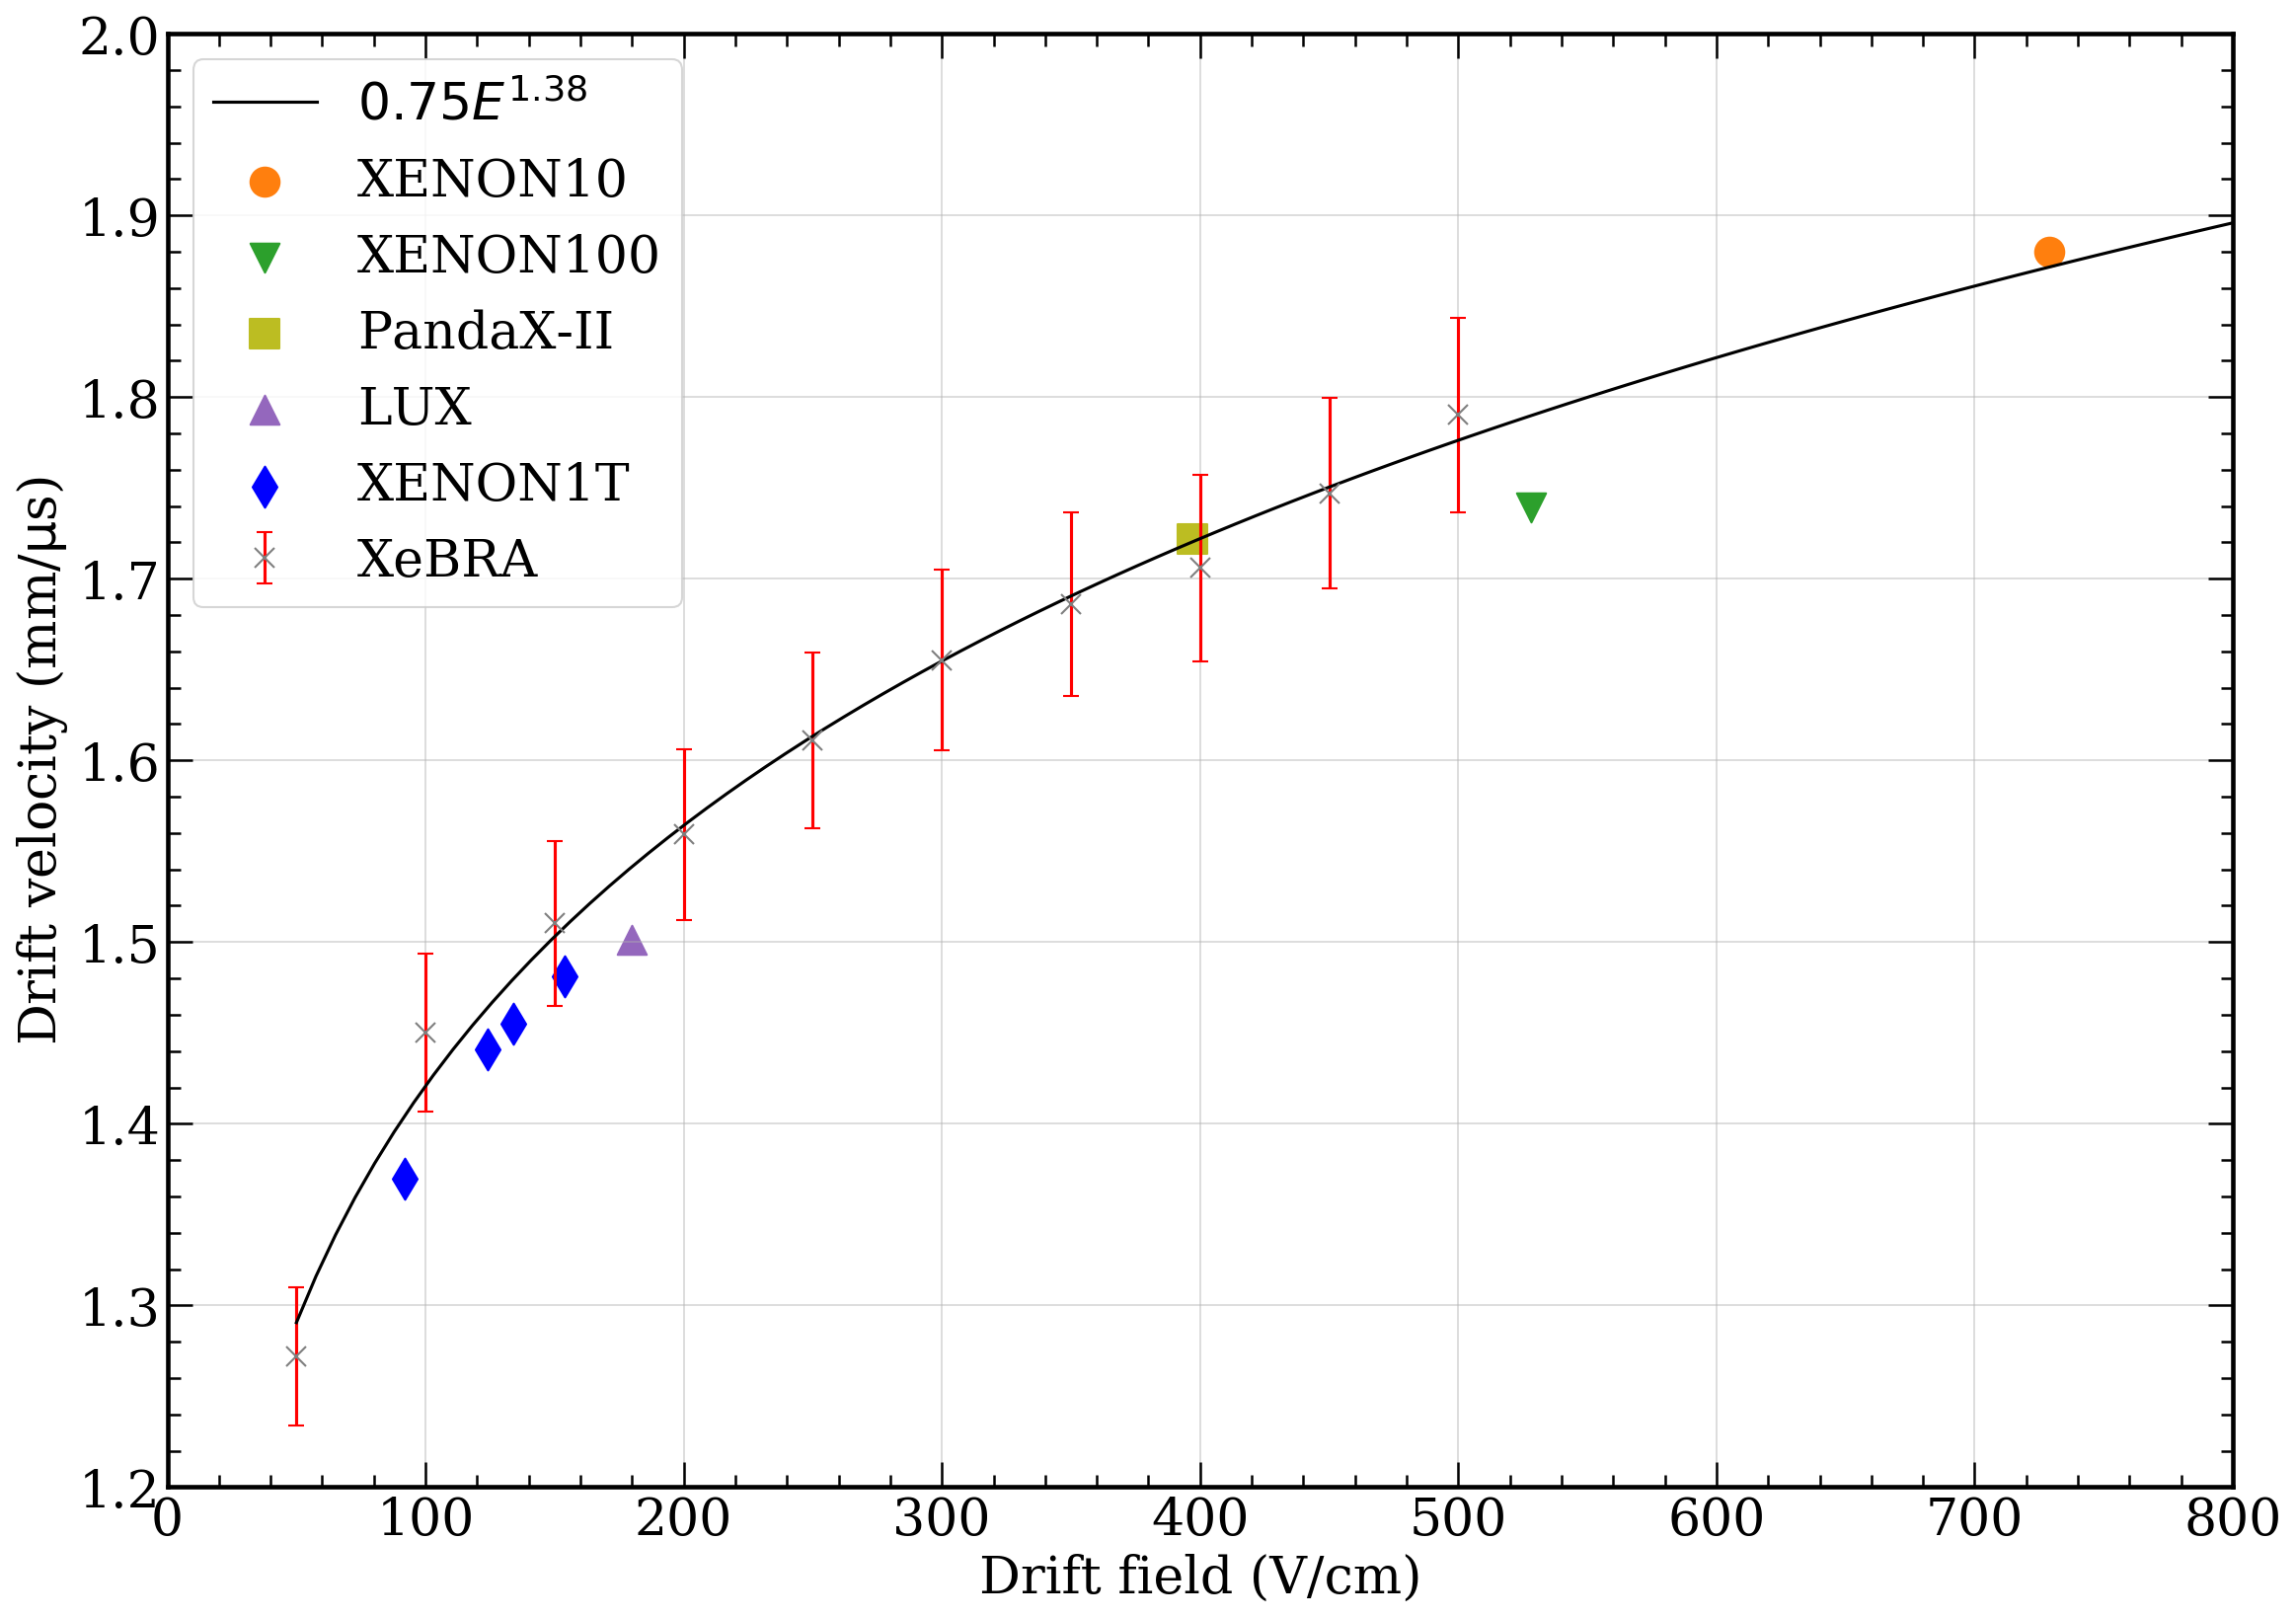

In [269]:
def power_law(x,a,b):
    power_law = a*x**b
    return power_law

p0 = [0.7,0.1]
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
SIZE = 25
EXTRA_SIZE = 30

plt.rc('axes', titlesize=EXTRA_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
# plt.rc('legend', fontsize=25)    # legend fontsize
# plt.rc('figure', titlesize=SIZE)



# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

Drift_field_range = np.linspace(50,800,100)
Drift_field = [500,450,400,350,300,250,200,150,100,50]
Drift_time_list = np.array([40500,41500,42500,43000,43800,45000,46500,48000,50000,57000])*1e-3
Drift_time_list_error = np.array([40500,41500,42500,43000,43800,45000,46500,48000,50000,57000])*1e-3*0.05

Xenon10_v = 1.880
Xenon100_v = 1.739
PandaXII_v = 1.722
Lux_v = 1.501
Xenon1T_v = [1.370,1.441,1.455,1.481]

Xenon10_field = 729
Xenon100_field = 528
PandaXII_field = 397
Lux_field = 180
Xenon1T_field = [92,124,134,154]


Drift_velocity_list = 72.5/np.array(Drift_time_list)
Drift_velocity_list_error = 72.5/np.array(Drift_time_list)*0.03

popt, pcov  = curve_fit(power_law, Drift_field, Drift_velocity_list, p0=p0, sigma=np.maximum(np.sqrt(Drift_velocity_list), np.ones_like(Drift_velocity_list)))



axes.errorbar(Drift_field,Drift_velocity_list,yerr=Drift_velocity_list_error,marker = 'x',fmt='.', c = 'C7',markersize='10', ecolor='red',capsize=4, label = 'XeBRA')

axes.scatter(Xenon10_field, Xenon10_v, marker = 'o', s=200, c = 'C1', label = 'XENON10')
axes.scatter(Xenon100_field, Xenon100_v, marker = 'v', s=200, c = 'C2', label = 'XENON100')
axes.scatter(PandaXII_field, PandaXII_v, marker = 's', s=200, c = 'C8', label = 'PandaX-II')
axes.scatter(Lux_field, Lux_v, marker = '^', s=200, c = 'C4', label = 'LUX')
axes.scatter(Xenon1T_field, Xenon1T_v, marker = 'd', s=200, c = 'b', label = 'XENON1T')

axes.plot(Drift_field_range,power_law(Drift_field_range,*popt), color = 'k', label = '$0.75E^{1.38}$')
#axes.scatter(Drift_field_experiments, Drift_velocity_experiments, marker = 'o', s=200)
#axes.plot(x,y)
#axes.set_yscale('log')
#axes.set_xscale('log')
axes.set_ylabel('Drift velocity (mm/$\mathrm{\mu}$s)')
axes.set_xlabel('Drift field (V/cm)')
plt.ylim(1.2, 2)
plt.xlim(0, 800)
plt.grid(alpha = 0.5)
plt.legend(loc =2)
plt.show()

In [254]:
Average_time_kr_S1 = [j-i for i, j in zip(Timestamps_kr_events[:-1], Timestamps_kr_events[1:])]

max(Average_time_kr_S1)

97705510

[912 804 823 689 681 712 604 609 587 547 559 488 459 445 423 385 341 376
 324 299 283 259 265 248 233 260 220 226 170 219 193 160 157 160 159 138
 117 127 122 128  98  84  89 109  85  72  84  69  58  57  61  53  46  49
  55  49  49  42  41  38  49  34  27  30  37  35  25  23  27  20  19  25
  25  20  13  25  11  12  16  15  11  10  14   9  17   7   7   4   9   7
   4   4   4   4   6   2   5   2   6]
[9.04425080e+02 1.06656303e-07]
6498886.229377603


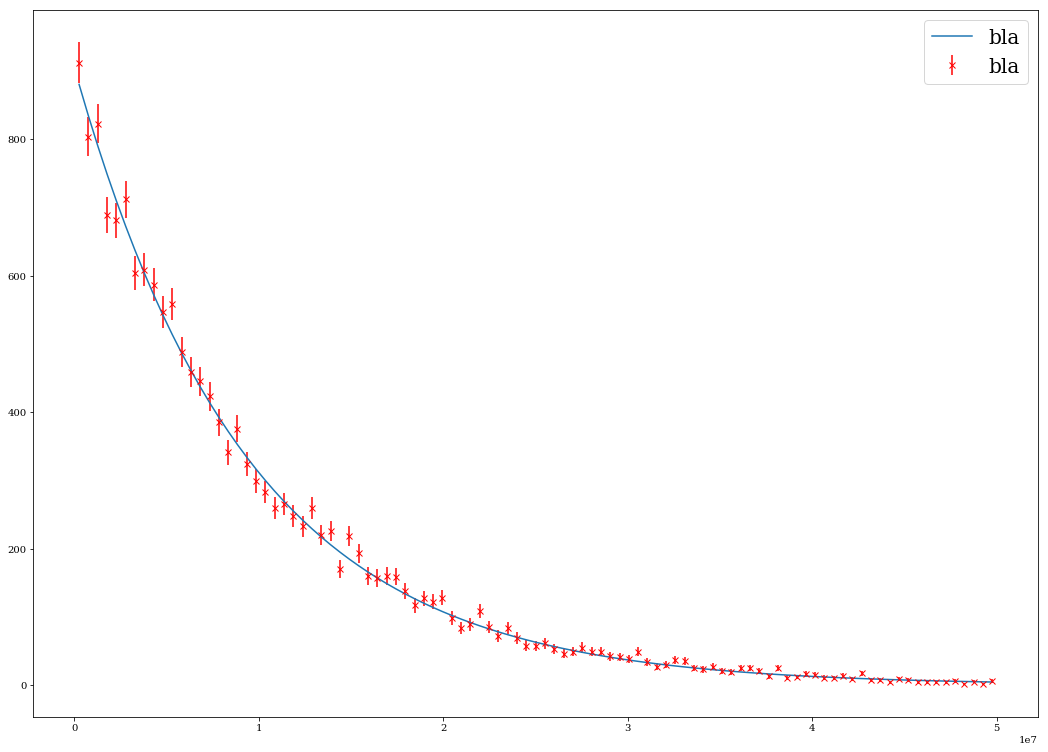

In [267]:
fig, ax = plt.subplots(figsize=(18,13))
def expo(x,a,b):
    expo = a*np.exp(-b*x)
    return expo

p0= [1000,1e-7]
#bounds = ((0, 0),(np.inf, np.inf ))
hist_max = 0.6e8
hist_min = 0.01e8

bins = np.linspace(0, 5e7, 100)
Time_between_krS1, binEdges = np.histogram(Average_time_kr_S1, bins=bins)
#Time_between_krS1 = np.array(Time_between_krS1)/1e9
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
print(Time_between_krS1)
popt, pcov = curve_fit(expo, bincenters, Time_between_krS1, p0=p0, sigma = np.sqrt(Time_between_krS1), maxfev =10000)
plt.plot(bincenters, expo(bincenters, *popt), label = 'bla')
plt.errorbar(bincenters, Time_between_krS1, yerr=np.sqrt(Time_between_krS1), fmt = 'rx', label = 'bla' )
plt.legend(prop={'size': 20})
print(popt)
print(1/popt[1]*np.log(2))
plt.show()
